In [1]:
import numpy as np 

from tensorflow.keras import datasets, layers, models 
import matplotlib.pyplot as plt

import os

import cv2 
from skimage.io import imread

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Creating a dataset object using images
import tensorflow as tf
data = tf.keras.utils.image_dataset_from_directory('/kaggle/input/nike-adidas-and-converse-imaged/train')

Found 711 files belonging to 3 classes.


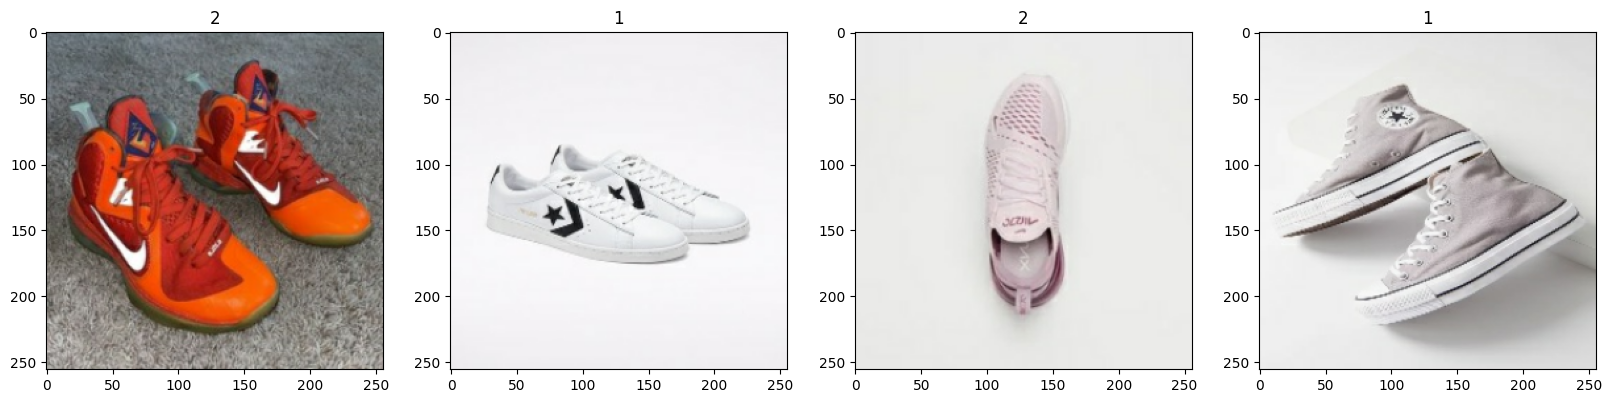

In [3]:
#Batching the data
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
batch[1].shape
#Plotting 4 images and identifying which class is which shoe
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


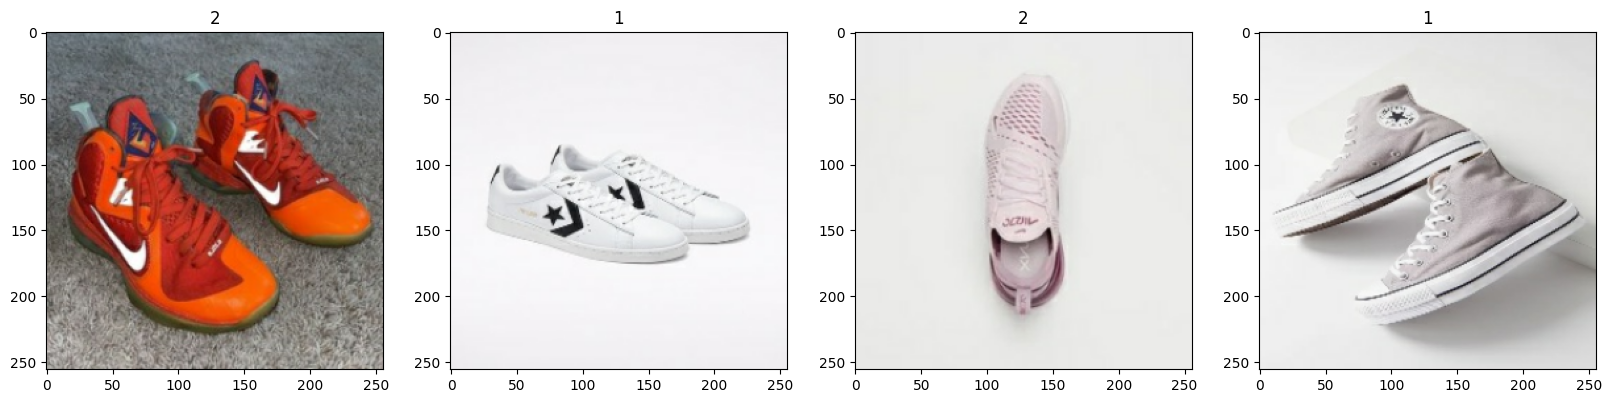

In [4]:
#Scaling and normalizing the data
data = data.map(lambda x,y: (x/255,y))
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [5]:
len(data)

23

In [6]:
#Splitting the Data
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1


In [7]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size).skip(val_size).take(test_size)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout 

In [9]:
#Building the model
model = Sequential()
#Input layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3))


In [10]:
#Compiling the model
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       147584    
                                                                 
 flatten (Flatten)           (None, 460800)            0

In [11]:
#Training the model
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
16/16 [==============================] - 15s 180ms/step - loss: 4.1000 - accuracy: 0.3457 - val_loss: 1.0726 - val_accuracy: 0.4453
Epoch 2/20
16/16 [==============================] - 3s 179ms/step - loss: 1.1116 - accuracy: 0.4570 - val_loss: 1.0908 - val_accuracy: 0.4766
Epoch 3/20
16/16 [==============================] - 3s 161ms/step - loss: 1.0687 - accuracy: 0.4824 - val_loss: 1.0407 - val_accuracy: 0.5469
Epoch 4/20
16/16 [==============================] - 3s 161ms/step - loss: 1.0524 - accuracy: 0.5293 - val_loss: 0.9142 - val_accuracy: 0.6094
Epoch 5/20
16/16 [==============================] - 3s 179ms/step - loss: 0.8764 - accuracy: 0.6113 - val_loss: 0.7483 - val_accuracy: 0.6953
Epoch 6/20
16/16 [==============================] - 3s 160ms/step - loss: 0.6546 - accuracy: 0.7617 - val_loss: 0.5052 - val_accuracy: 0.8125
Epoch 7/20
16/16 [==============================] - 3s 161ms/step - loss: 0.4388 - accuracy: 0.8418 - val_loss: 0.4595 - val_accuracy: 0.8828
Epoch

In [12]:
#Predicting using text data
yhat = model.predict(test)
yhat

3/3 [==============================] - 1s 144ms/step


array([[ 3.46672416e-01,  1.13787781e-02, -2.50155985e-01],
       [-1.20592699e+01,  3.98284733e-01,  1.55873327e+01],
       [ 5.84652138e+00, -2.13770345e-01, -3.60616016e+00],
       [-1.25032520e+00, -8.01438904e+00,  1.60446033e+01],
       [ 1.25214732e+00,  4.56167841e+00, -1.91403699e+00],
       [-9.25520897e-01,  1.18198299e+01, -7.89394379e-01],
       [-1.15770996e+00, -8.98935127e+00,  1.15818758e+01],
       [-6.33805543e-02, -3.89825851e-01,  1.25283027e+00],
       [ 2.85189927e-01, -1.19157821e-01, -5.84996268e-02],
       [ 2.57643104e+00, -1.96728802e+00,  4.86734247e+00],
       [ 2.54511833e+01, -2.14499073e+01,  6.21975613e+00],
       [-1.02012801e+00,  2.25978851e+00,  6.06247568e+00],
       [-5.15867531e-01,  3.27879810e+00, -1.42089868e+00],
       [-2.29884297e-01, -2.69815832e-01,  9.56460893e-01],
       [-1.12361879e+01,  5.79544020e+00,  1.43719807e+01],
       [ 4.91643339e-01,  1.55889571e+00,  9.21327877e+00],
       [-1.73644185e+00,  8.19957435e-01

In [13]:
#Evaluating Model
loss, acc = model.evaluate(test, verbose = 0) 
acc

0.9718309640884399